<a href="https://colab.research.google.com/github/Madhurihawaldar55/ML-capstone-project/blob/main/ML_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering







##### **Project Type**    - Unsupervised ML
##### **Contribution**    - Individual
##### **Name**    - Madhuri Hawaldar

# **Project Summary -**

The aim of this project is to analyze the Netflix Dataset of movies and TV shows until 2019, sourced from the third-party search engine Flixable. The goal is to group the content into relevant clusters using NLP techniques to improve the user experience through a recommendation system. This will help prevent subscriber churn for Netflix, which currently has over 220 million subscribers.

Additionally, the dataset will be analyzed to uncover insights and trends in the streaming entertainment industry.

The project followed a step-by-step process:

Handling null values in the dataset.
Managing nested columns (director, cast, listed_in, country) for better visualization.
Binning the rating attribute into categories (adult, children's, family-friendly, not rated).
Performing Exploratory Data Analysis (EDA) to gain insights for preventing subscriber churn.
Creating clusters using attributes like director, cast, country, genre, rating, and description. These attributes were tokenized, preprocessed, and vectorized using TF-IDF vectorizer.
Reducing the dimensionality of the dataset using PCA to improve performance.
Employing K-Means Clustering and Agglomerative Hierarchical Clustering algorithms, determining optimal cluster numbers (4 for K-Means, 2 for hierarchical clustering) through various evaluation methods.
Developing a content-based recommender system using cosine similarity matrix to provide personalized recommendations to users and reduce subscriber churn for Netflix.

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# **GitHub Link -**

Provide your GitHub Link here.
#####https://github.com/Madhurihawaldar55/ML-capstone-project/blob/main/ML_Capstone_Project.ipynb

# **Problem Statement**



This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
#Data manipulation libraries
import pandas as pd
import numpy as np
import datetime as dt

#Data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go

#libraries used to process textual data
import string
string.punctuation
import nltk
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#libraries used to implement cluster
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import silhouette_visualizer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import k_means
from scipy.cluster.hierarchy import dendrogram

# Library of warnings would assist in ignoring warnings issued
import warnings;warnings.filterwarnings('ignore')
import warnings;warnings.simplefilter('ignore')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Dataset Loading

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
netflix_movies_tv_shows = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [5]:
df = netflix_movies_tv_shows
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"Number of rows : {len(df.axes[0])}")
print(f"Number of columns : {len(df.axes[1])}")

Number of rows : 7787
Number of columns : 12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())
print("percentage of missing values: ",df.isnull().sum()*100/len(df))

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64
percentage of missing values:  show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


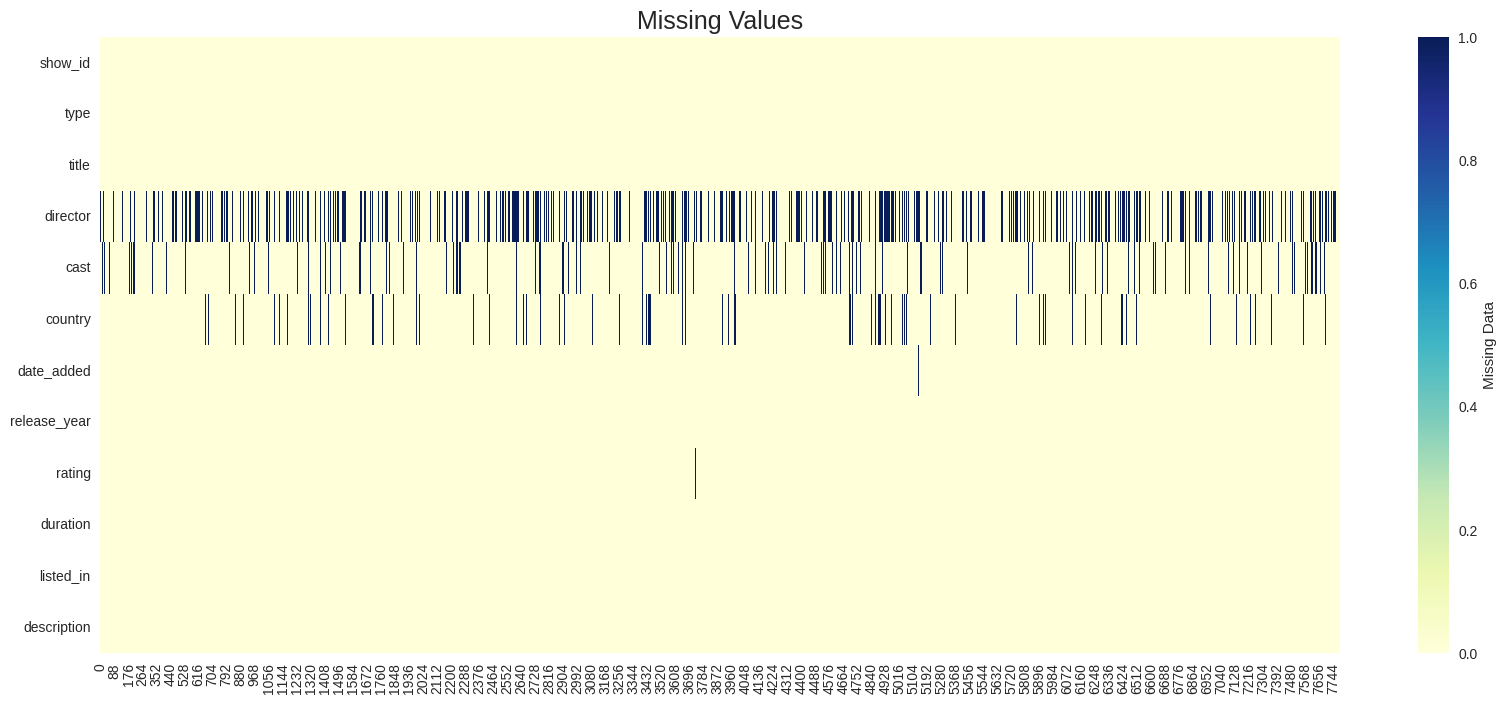

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(20,8))
sns.heatmap(df.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

plt.title('Missing Values', fontsize=18)
plt.show()

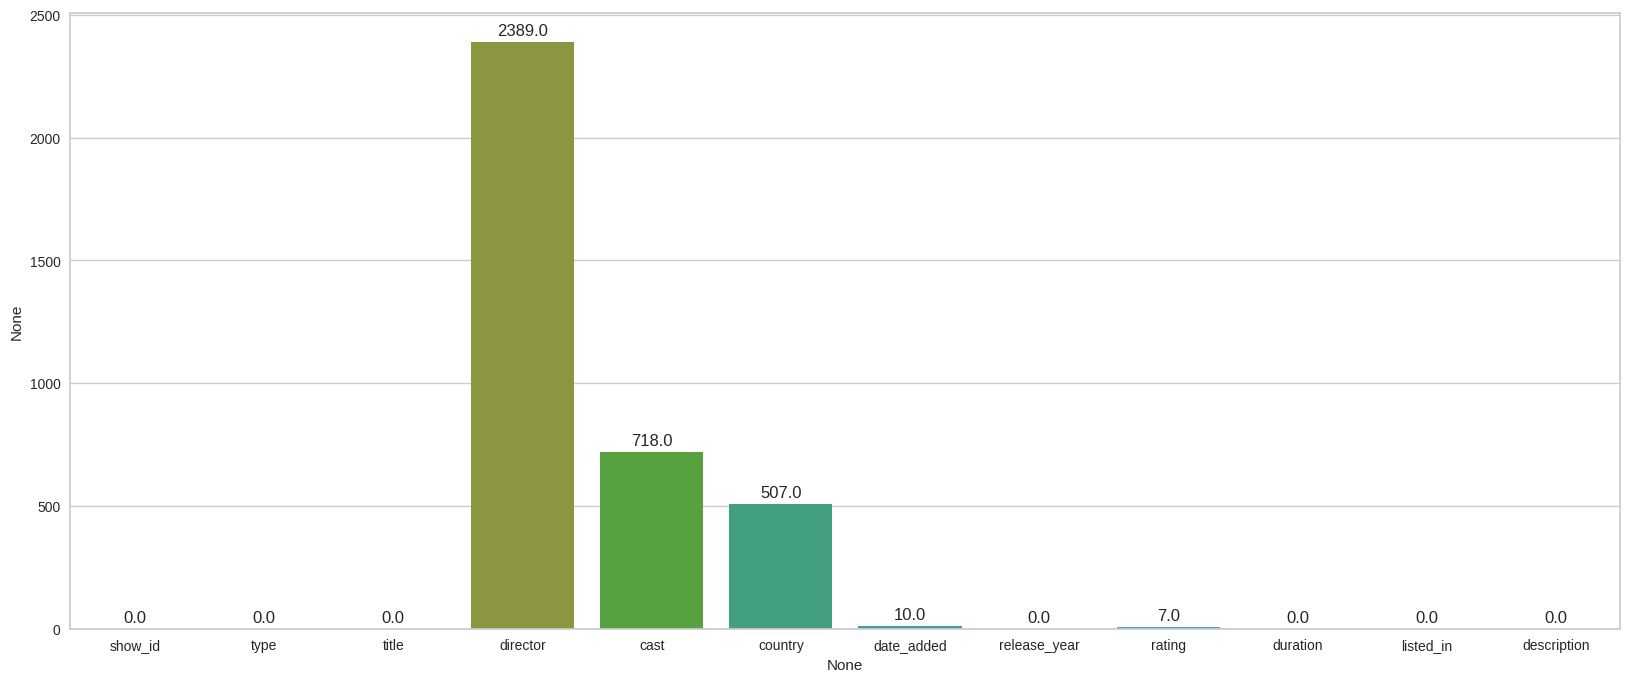

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(20,8))
plots=sns.barplot(x=df.columns,y=df.isna().sum(),palette='husl')
for bar in plots.patches:
    plots.annotate(bar.get_height(),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()



1.   Since 'date_added' and 'rating' has very less percentage of null count so we can drop those observations to avoid any biasness in our clustering model.
2.   We cannot drop or impute any values in 'director' and 'cast' as the null percentage is comparatevely high and we do not know data of those actual movie/TV shows, so its better to replace those entries with 'unknown'.
3. We can fill null values of 'country' with mode as we only have 6% null values and most of the movies/shows are from US only.



### What did you know about your dataset?

1. This dataframe has 7787 rows and 12 columns.
2. Dataframe has 11 columns with string datatype and only one column with int datatype.
3. Dataframe has no duplicated values.
4. Dataframe has missing values in the column director(2389), cast(718), country(507), date_added(10), ratings(7).

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(f"Available columns:\n{df.columns.to_list()}")

Available columns:
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [ ]:
# Dataset Describe
df.describe(include = 'all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description

The variable description for the dataframe Netflix movies and tv shows clustering is as follows.
1. Show_id - unique identifier for each movie or tv show
2. type - whether the entry is Movie or TV show
3. title - name of movie or tv show
4. director - name of director of movie or tv show
5. cast - names of actors and actresses worked in movie or tv show
6. country - name of country where movie or tv show produces
7. date_added - date when movie or tv show added in netflix
8. release_year - year when movie or tv show released
9. rating - rating of movie or tv show
10. duration - length of movie or show in minutes or seasons
11. listed_in - categories of movie or tv show
12. description - summary of movie or tv show

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
pd.Series({col:df[col].unique() for col in df})

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [nan, Jorge Michel Grau, Gilbert Chan, Shane A...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [ ]:
df['title'].value_counts()

3%                                          1
Results                                     1
Rich in Love                                1
Ricardo Quevedo: Los amargados somos más    1
Ricardo Quevedo: Hay gente así              1
                                           ..
Hamza's Suitcase                            1
Hamid                                       1
Hamburger Hill                              1
Hamara Dil Aapke Paas Hai                   1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     1
Name: title, Length: 7787, dtype: int64

In [ ]:
df['director'].value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
                          ..
Vibhu Virender Puri        1
Lucien Jean-Baptiste       1
Jason Krawczyk             1
Quinn Lasher               1
Sam Dunn                   1
Name: director, Length: 4049, dtype: int64

In [ ]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [ ]:
df['cast'].value_counts()

David Attenborough                                                                                                                                                            18
Samuel West                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                    7
Kevin Hart                                                                                                                                                                     6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath                                                         6
                                                                                                                   

In [ ]:
df['date_added'].value_counts()

January 1, 2020      118
November 1, 2019      94
December 31, 2019     76
March 1, 2018         76
October 1, 2018       72
                    ... 
October 12, 2014       1
March 22, 2020         1
March 31, 2013         1
December 12, 2019      1
January 11, 2020       1
Name: date_added, Length: 1565, dtype: int64

In [6]:
# Handling missing values
df['director'].fillna("Director Unavailable",inplace=True)
df['country'].fillna(df['country'].mode()[0],inplace=True)
df['cast'].fillna("Cast Unavaible",inplace=True)
df.dropna(subset=['date_added','rating'],inplace=True)

In [7]:
#count missing values
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [8]:
df['date_added']=pd.to_datetime(df['date_added'])

In [9]:
#Extracting date,day, month,year from date_added column
df['day_added'] = df['date_added'].dt.day
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added',axis = 1,inplace = True)

In rating column we have different categoreis these are content rating classification that are commonly used in the United states and other countries to indicate appropriateness of media content for different age groups.Let's understand each of them and binning them accordingly
TV-MA : This rating is used for mature audience only, and it may contain strong language, violence,nudity and sexual content.
R : This rating is used for movies that are intended for audiences 17 and older. It may contain graphic violence, strong language, drug use and sexual content.
PG-13 : This rating is used for movies that may not be suitable for children under 13. It may contain violence, mild to moderate language and suggestive content.
TV-14 : This rating is used for TV shows that may not be suitable for children under 14. It may contain violence, strong language, sexual situations, and suggestive dialogue.
TV-PG : This rating is used for TV shows that may not be suitable for children under 8. It may contain mild violence, language and suggestive content.
NR : This stands for "Not Rated". It means that the content has not been rated by a rating board, and it may contain material that is not suitable for all audiences.
TV-G : This rating is used for TV shows that are suitable for all ages. It may contain some mild violence, language and suggestive content.
TV-Y : This rating is used for children's TV shows that are suitable for all ages. It is intended to be appropriate for preschool children.
TV-Y7 : This rating is used for children's TV shows that may not be suitable for children under 7. It may contain mild language, some violence and some suggestive content.
G : This rating is used for movies that are suitable for general audiences. It may contain some mild language and some violence.
NC-17 : This rating is used for movies that are intended for adults only. It may contain explicit sexual content, violence and language.
TV-Y7-FV : This rating is used for children's TV shows that may not be suitable for children under 7.It may contain fantacy violence.
UR : This stands for "Unrated". It means that the content has not been rated by a rating board and it may contain material that is not suitable for all audiences.
##****Let's not complicate it and create bins as following :****##
1. Adult content : TV-MA, NC-17, R
2. Children content : TV-PG, PG, TV-G, G
3. Teen content : PG-13, TV-14
4. Family-friendly content : TV-Y, TV-Y7, TV-Y7-FV
5. Not Rated : NR,

In [10]:
# binning the vaues in the rating column
new_rating = {'TV-MA':'Adult Content', 'R':'Adult Content', 'PG-13':'Teen Content', 'TV-14':'Teen Content', 'TV-PG':'Children Content', 'NR':'Not Rated', 'TV-G':'Children Content', 'TV-Y':'Family-friendly Content', 'TV-Y7':'Family-friendly Content', 'PG':'Children Content', 'G': 'Children Content', 'NC-17':'Adult Content', 'TV-Y7-FV':'Family-friendly Content', 'UR':'Not Rated'}

In [11]:
#unique values in rating column
df['rating'].replace(new_rating,inplace=True)
df['rating'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

In [12]:
tv_shows = df[df['type']=='TV Show']
movies = df[df['type']=='Movie']

### What all manipulations have you done and insights you found?

1.We have divided data wrangling into five different sections:

1.   In this section we have imputed/drop the null values of:
2. Imputed 'director' and 'cast' with 'Unknown'.
3. Imputed 'country' with Mode.
4. Drop null values of 'date_added' and 'rating' (less percentage).

2.We have also extracted the following features:
'date' from 'date_added'

*   'date' from 'date_added'
*  'month' from 'date_added'
*   'year' from 'date_added'

3.We have seen that the 'rating' column contains various coded categories, so we have decided to create 5 bins and distribute the values accordingly:
*   Adult: TV-MA, NC-17
*   Restricted: R, UR
*   Teen: PG-13, TV-14
*  All Ages: TV-G, TV-Y, TV-Y7, TV-Y7-FV, PG, G, TV-PG
*   Not Rated: NR

4.Lastly we have splitted the dataframe into two df one is 'df_movies' that contains only Movies and the other is 'df_tvshows' that contains only TV Shows for our further analysis.



*   List item
*   List item




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1  - ****Content percentage on Netflix\****

In [ ]:
df.groupby('type').size()

type
Movie      5372
TV Show    2398
dtype: int64

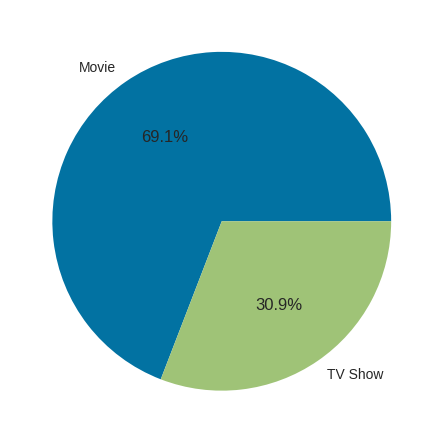

In [ ]:
df.groupby('type').size().plot(kind='pie',autopct='%1.1f%%')
plt.gca().spines[['top', 'right',]].set_visible(False)

##### 1. Why did you pick the specific chart?

The pie chart represents data in a pictorial form, making it easier to visualize and understand the proportionate parts or composition of a data set.
So to compare movies and tv shows based on their content proportion, I used pie chart.

##### 2. What is/are the insight(s) found from the chart?



*   The pie chart shows that on Netflix 69.1% content is of movie (5372 movies).
*   The pie chart shows that on Netflix 30.9% content is of tv shows (2398 tv shows).



##### 3. Will the gained insights help creating a positive business impact?
Yes, the gained insights create positive bussiness impact. These insights shows the demand of content available on Netflix.

Answer Here

#### Chart - 2 - ****Content percentage of Country on Netflix****

In [ ]:
df['country'].value_counts().head()

United States     3051
India              923
United Kingdom     396
Japan              224
South Korea        183
Name: country, dtype: int64

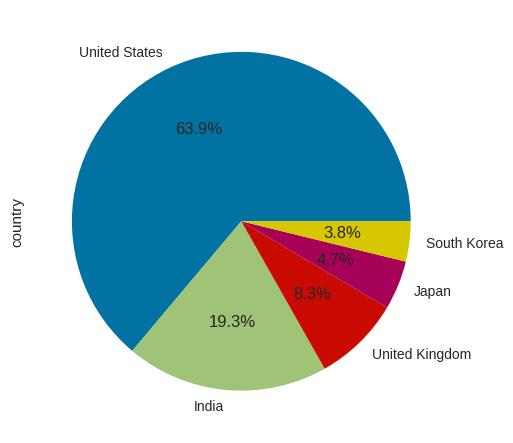

In [ ]:
df['country'].value_counts().head().plot(kind='pie',autopct='%1.1f%%')
plt.show()

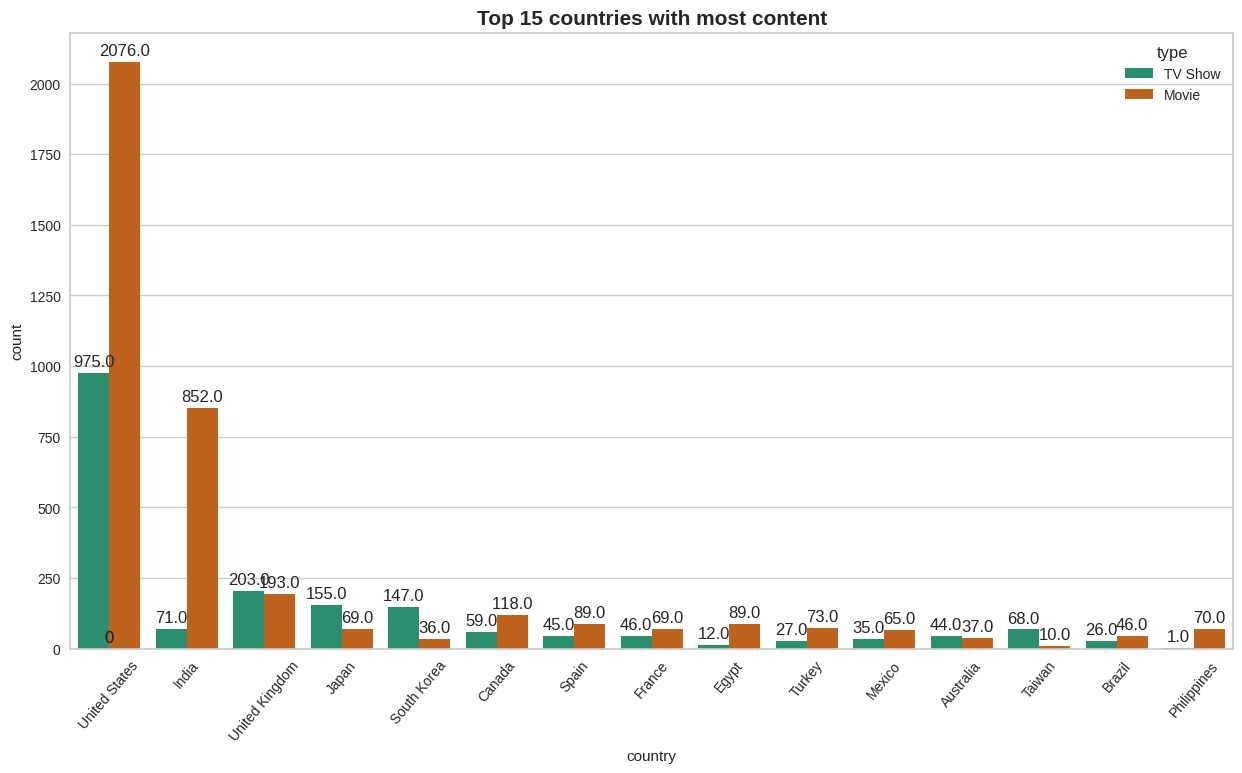

In [ ]:
plt.figure(figsize=(15,8))
plots=sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:15],hue=df['type'],palette='Dark2')
plt.xticks(rotation=50)
plt.title("Top 15 countries with most content",fontsize=15,fontweight='bold')
for bar in plots.patches:
    plots.annotate(bar.get_height(),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

1. The pie chart represents data in a pictorial form, making it easier to visualize and understand the proportionate parts or composition of a data set. So to compare content of movies and tv shows with respect to countries.
2. Show the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

##### 2. What is/are the insight(s) found from the chart?

From pie chart and bar plot we can say that:
1. 63.9% of content on Netflix is of the country United States.
2. India is the second country with 19.3% content on Netflix.
3. Top 5 countries with highest content on Netflix are United States, India,United Kingdom,Japan, South Korea, Canada.

##### 3. Will the gained insights help creating a positive business impact?
Yes the gained insights help in comparing which country is more active on the Netflix platfom.

Answer Here

#### Chart - 3- ****Content production growth based on Year****

Text(0.5, 1.0, 'Production growth based on year')

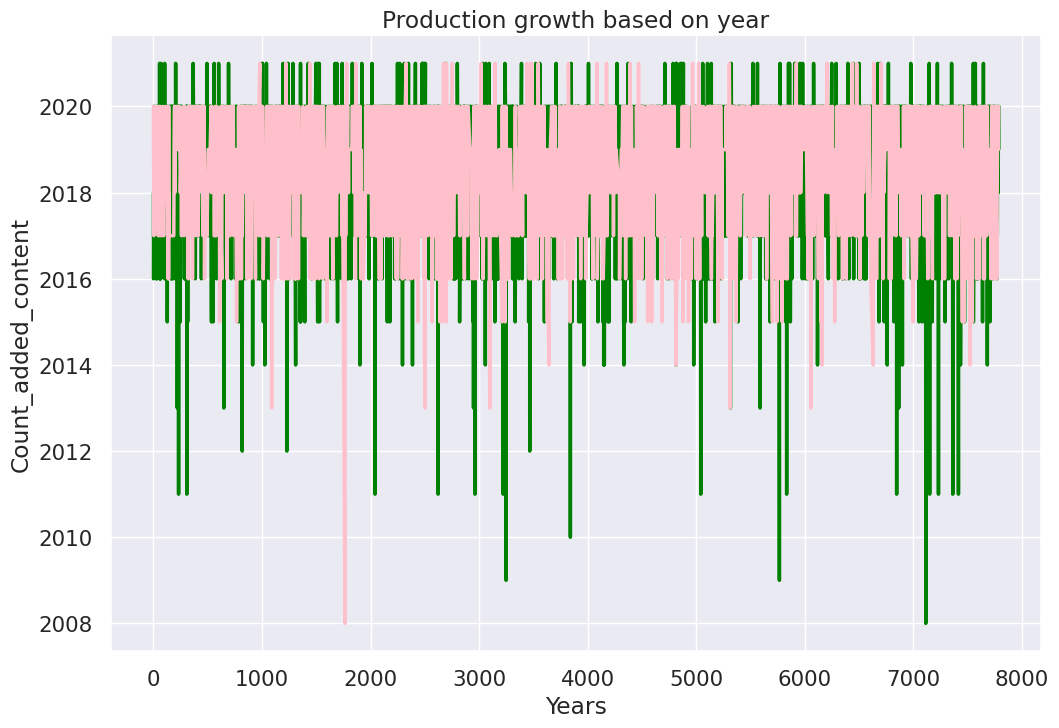

In [ ]:
sns.set(font_scale=1.4)
movies['year_added'].plot(figsize=(12,8),linewidth=2.5,color='green',label='movies\year')
tv_shows['year_added'].plot(figsize=(12,8),linewidth=2.5,color='pink',label='tv_shows\year')
plt.xlabel("Years")
plt.ylabel("Count_added_content")
plt.title("Production growth based on year")

##### 1. Why did you pick the specific chart?

Line graphs are useful in that they show data variables and trends very clearly and can help to make predictions about the results of data not yet recorded.

##### 2. What is/are the insight(s) found from the chart?

From the plot we must say that the content of movies and tv shows added on the Netflix is increasing with year.

##### 3. Will the gained insights help creating a positive business impact?
Yes. The gained insights shows positive growth in content production on Netflix.

Answer Here

#### Chart - 4- ****Netflix released content over Year****

In [ ]:
movie_released_year = movies['release_year'].value_counts().reset_index().rename(columns={'index':'release_year','release_year':'count_movie'})
print(pd.DataFrame(movie_released_year).head())
tvshows_released_year = tv_shows['release_year'].value_counts().reset_index().rename(columns={'index':'release_year','release_year':'count_tvshow'})
print(pd.DataFrame(tvshows_released_year).head())

   release_year  count_movie
0          2017          742
1          2018          734
2          2016          642
3          2019          582
4          2020          411
   release_year  count_tvshow
0          2020           457
1          2019           414
2          2018           386
3          2017           268
4          2016           239


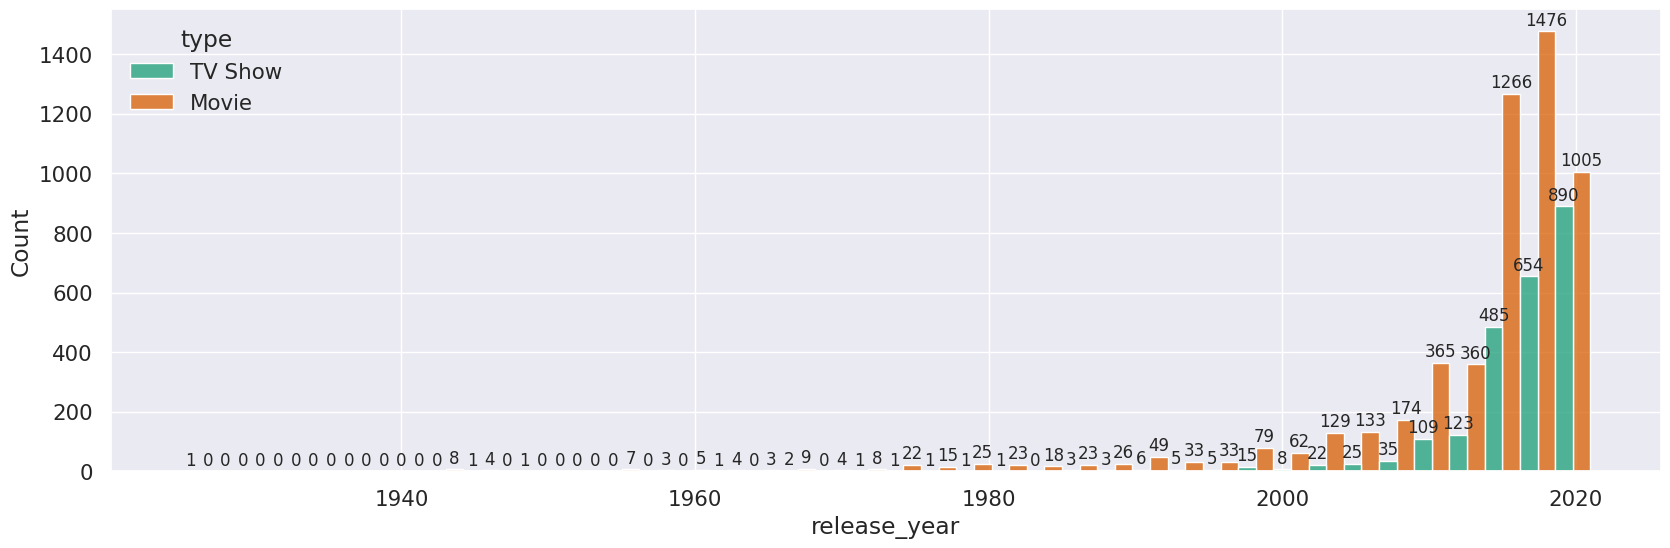

In [ ]:
fig,ax = plt.subplots(figsize=(20,6))
plots=sns.histplot(df,x='release_year',hue='type',multiple='dodge',color='dark',bins=40,ax=ax,palette='Dark2')
for bar in plots.patches:
    plots.annotate(bar.get_height(),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

A histogram is a chart that plots the distribution of a numeric variable's values as a series of bars.

##### 2. What is/are the insight(s) found from the chart?

1. Maximum content of movies released in the year 2017 (742) followed by the year 2018(734), 2016 (642), 2019 (582), 2020 (411)
2. Maximum content of tv shows released in the year 2020 (547), followed by the year 2019 (414), 2018 (386)

##### 3. Will the gained insights help creating a positive business impact?
The barplot shows positive growth in the content added as tv shows and negative growth in the content added as movie with year.

Answer Here

#### Chart - 5- ****Rating percentage comparison for different age group****

In [ ]:
df.groupby('rating').size()

rating
Adult Content              3529
Children Content           1284
Family-friendly Content     555
Not Rated                    88
Teen Content               2314
dtype: int64

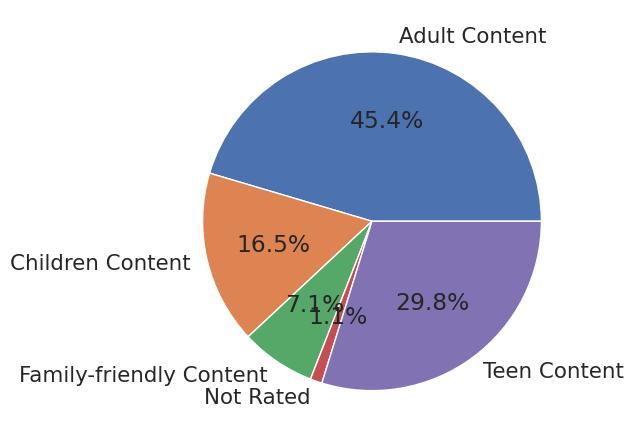

In [ ]:

# Chart - 5 visualization code
df.groupby('rating').size().plot(kind='pie',autopct='%1.1f%%')
plt.show()

##### 1. Why did you pick the specific chart?

The pie chart represents data in a pictorial form, making it easier to visualize and understand the proportionate parts or composition of a data set.
So to compare content of movies and tv shows based on their rating I used pie ,chart.

##### 2. What is/are the insight(s) found from the chart?

Netflix has the rating system based on age group. From the piechart we say that most of the content on Netflix is for Adult age group followed by teen age group and children age group.

##### 3. Will the gained insights help creating a positive business impact?
The gained insights helps to understand that Netflix contains the content that suitable for all age group.

#### Chart - 6 - The Distribution of Duration of movie contents over Netflix

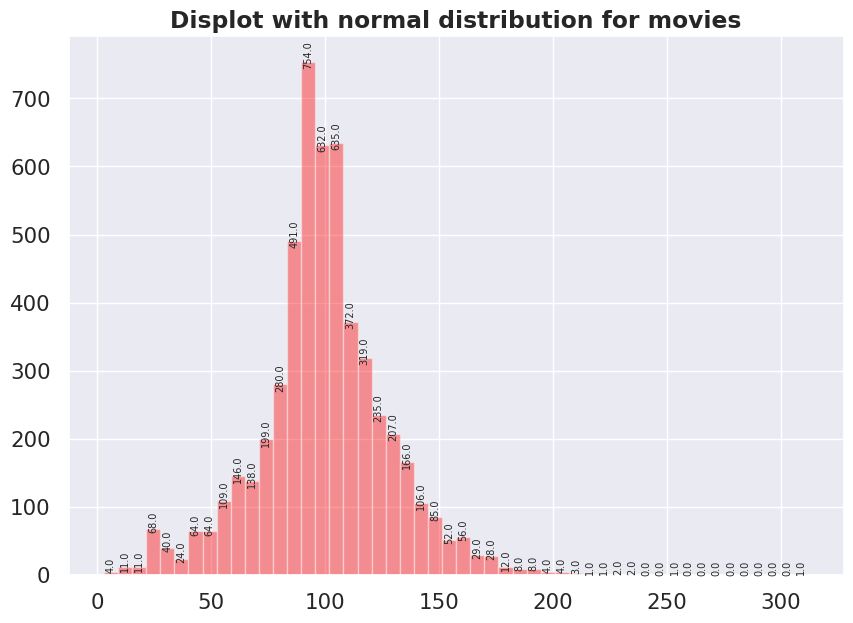

In [ ]:
# checking distribution of movies duration
plt.figure(figsize=(10,7))
plots=sns.distplot(movies['duration'].str.extract('(\d+)'),kde=False,color=['red'])
plt.title('Displot with normal distribution for movies',fontweight='bold')
for bar in plots.patches:
    plots.annotate(bar.get_height(),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=7, xytext=(0, 5),textcoords='offset points',rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

Seaborn Distplot represents the overall distribution of continuous data variables.

##### 2. What is/are the insight(s) found from the chart?

1. Most movies on Netflix have durations between 80 to 120 minutesT.
2. Maximum time duration that movies have is 90 minutes.

#### Chart - 7 - The Distribution of Duration of tv shows contents over Netflix

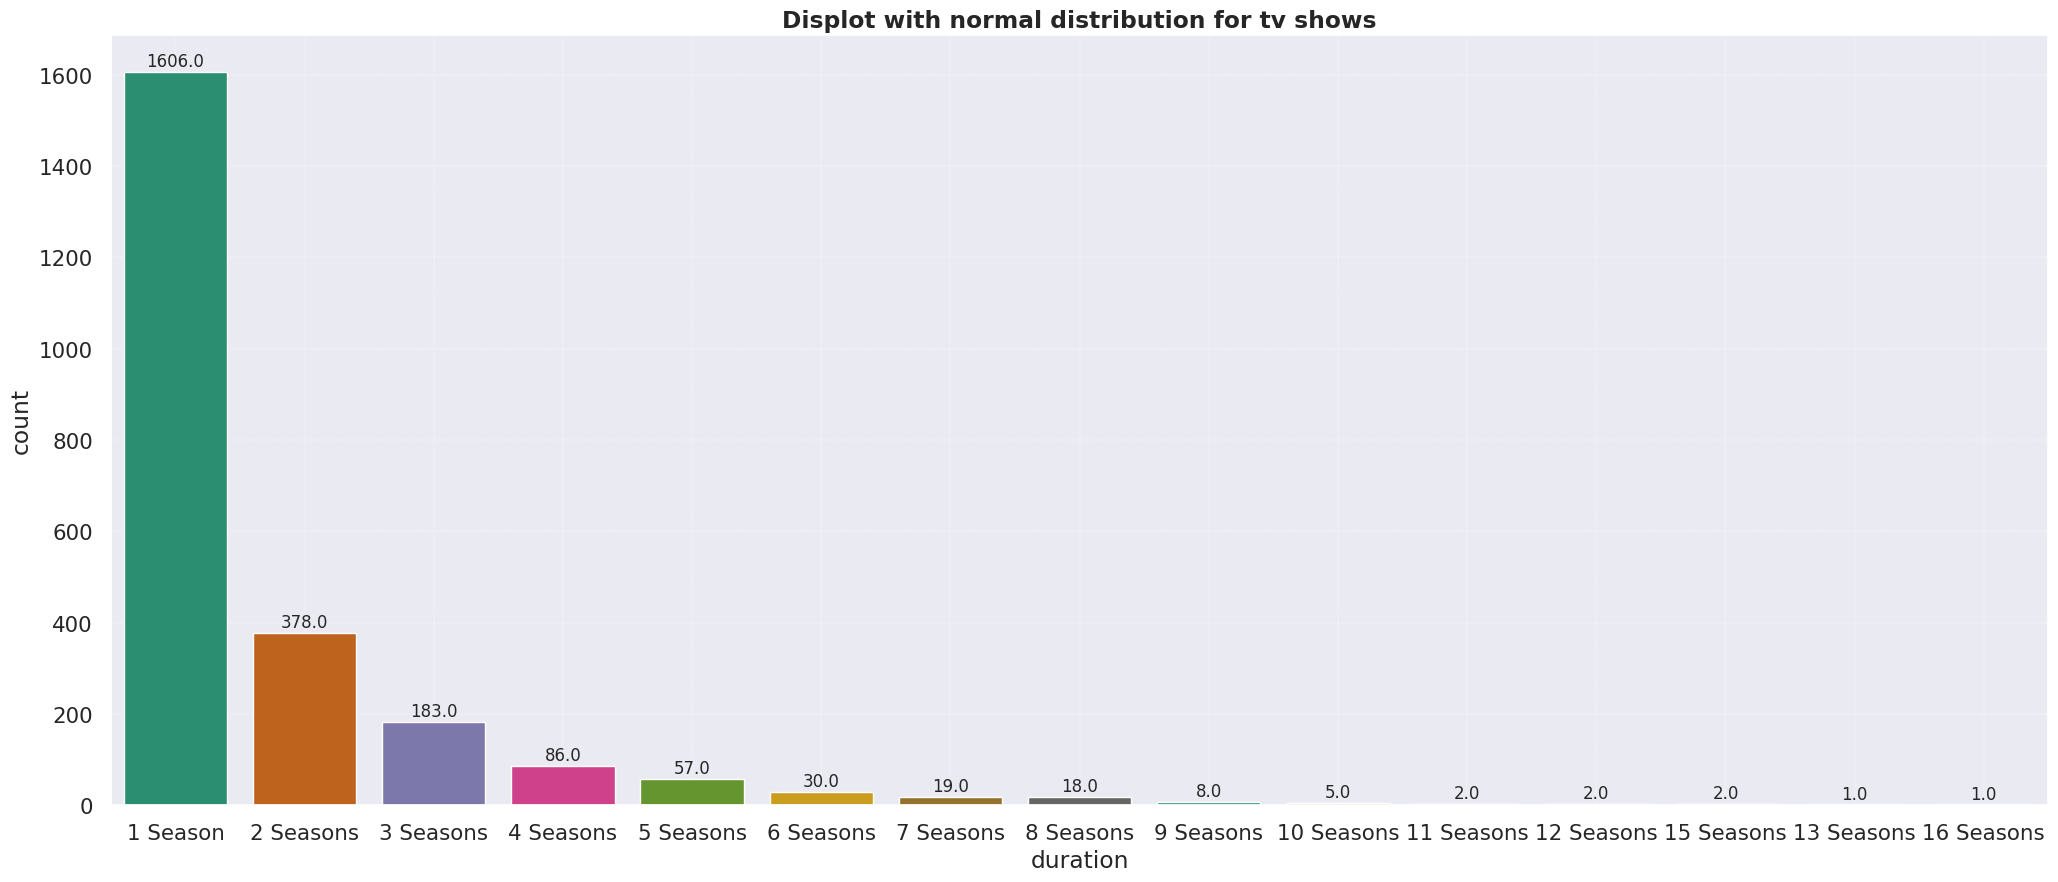

In [ ]:
# checking distribution of tv shows duration
plt.figure(figsize=(25,10))
plots=sns.countplot(x=tv_shows['duration'],data=tv_shows,order=tv_shows['duration'].value_counts().index,palette='Dark2')
plt.title('Displot with normal distribution for tv shows',fontweight='bold')
plt.grid(linestyle='--', linewidth=0.3)
for bar in plots.patches:
    plots.annotate(bar.get_height(),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Show the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

##### 2. What is/are the insight(s) found from the chart?

TV shows commonly have one or two seasons.


#### Chart - 8- ****Movies duration for rating group****

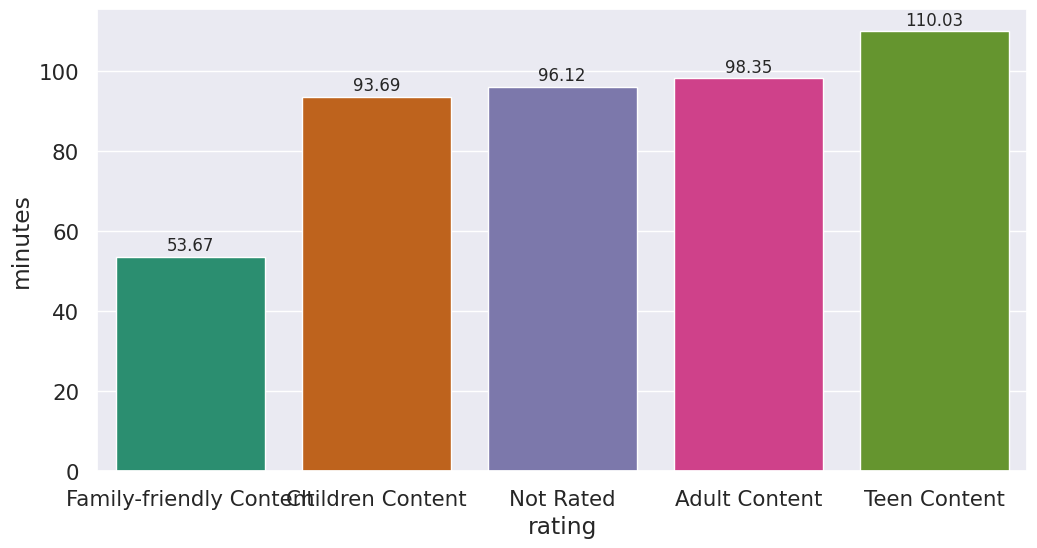

In [ ]:
movies['minutes']=movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)
duration_year = movies.groupby(['rating'])['minutes'].mean()
duration_df = pd.DataFrame(duration_year).sort_values('minutes')
plt.figure(figsize=(12,6))
plots=sns.barplot(x=duration_df.index,y=duration_df.minutes,palette='Dark2')
for bar in plots.patches:
    plots.annotate(round(bar.get_height(),2),(bar.get_x() + bar.get_width() / 2,round(bar.get_height(),2)), ha='center', va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Vertical bar charts are useful to compare different categorical or discrete variables so I used barplot.

##### 2. What is/are the insight(s) found from the chart?

The barplot of rating and duration shows that teen age group content has maximum time period (in minutes) followed by adult age group content.

#### Chart - 9-****Movies added on Netflix over Year****

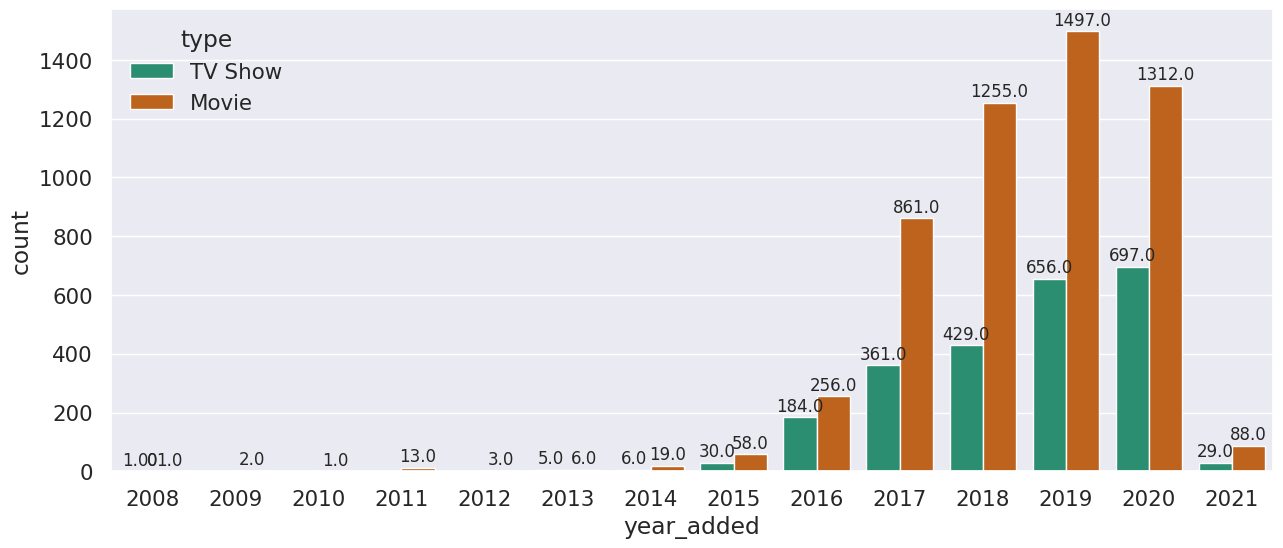

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
plots=sns.countplot(x='year_added',hue='type',data=df,ax=ax,palette='Dark2')
for bar in plots.patches:
    plots.annotate(bar.get_height(),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Show the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

##### 2. What is/are the insight(s) found from the chart?

1. Maximum number of movies added on Netflix is in the year 2019.
2. Maximum number of tv shows added on Netflix is in the year 2020.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Insights helps in understanding business growth over year.

#### Chart - 10- ****Movies added on Netflix over Month****

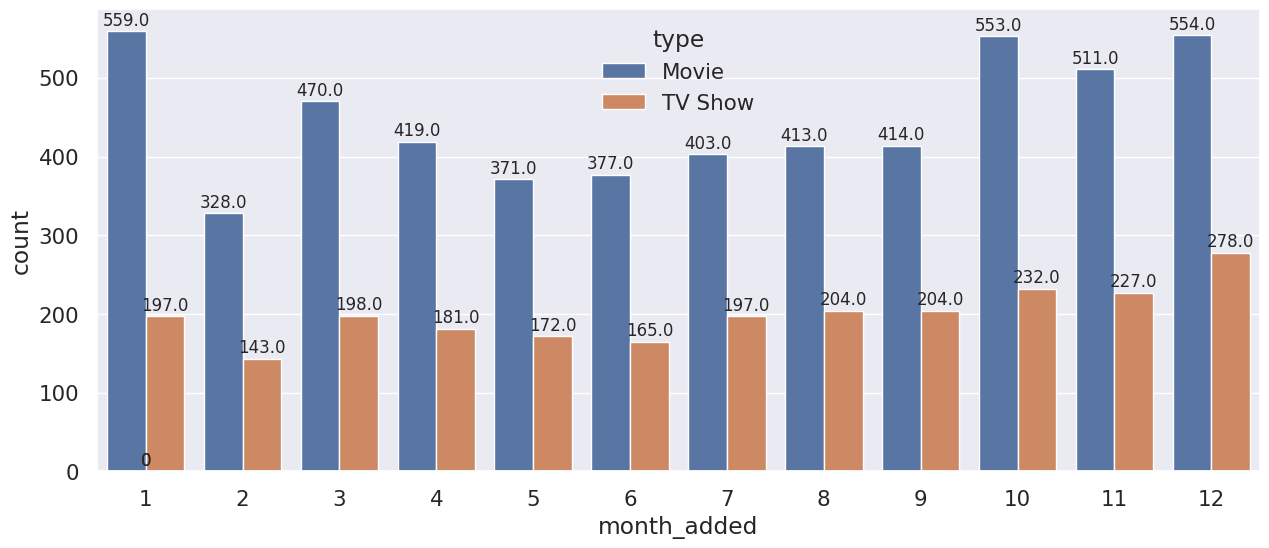

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
plots=sns.countplot(x='month_added',hue='type',data=df,ax=ax)
for bar in plots.patches:
    plots.annotate(bar.get_height(),(bar.get_x() + bar.get_width() / 2,bar.get_height()), ha='center', va='center',size=12, xytext=(0, 8),textcoords='offset points')
plt.show()

##### 1. Why did you pick the specific chart?

Show the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

##### 2. What is/are the insight(s) found from the chart?

1. From plot we say that, mostly the movies added on Netflix are in the month January, October, December and November.
2. From plot the tv shows added on Netflix mostly in the month December, November and October.

#### Chart - 11- ****Movies added on Netflix over Day****

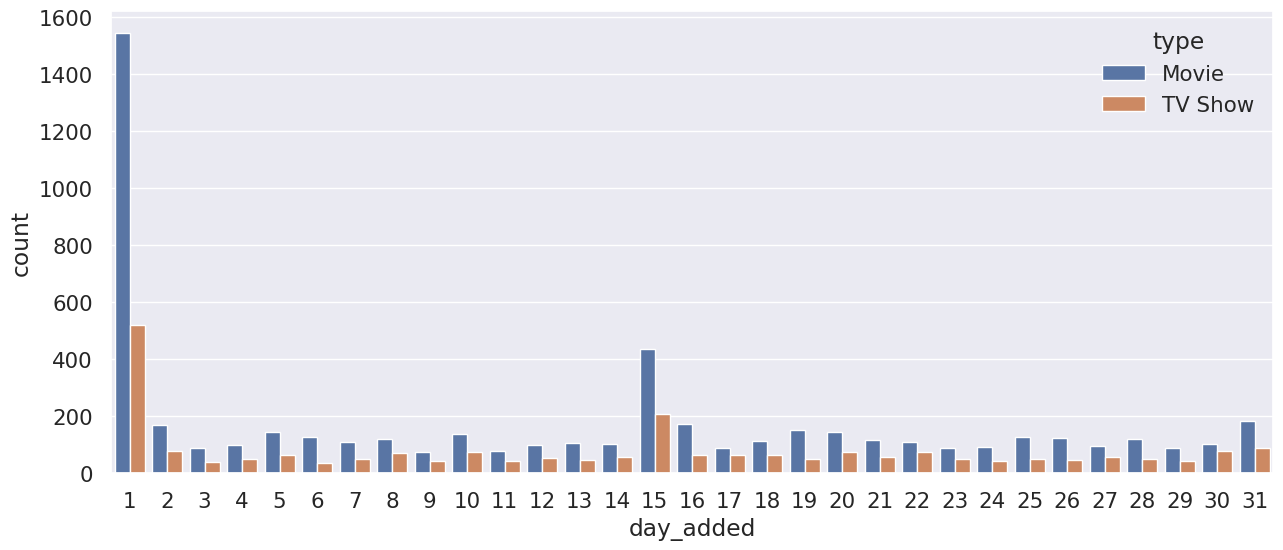

In [ ]:
fig,ax = plt.subplots(figsize=(15,6))
plots=sns.countplot(x='day_added',hue='type',data=df,ax=ax)

##### 1. Why did you pick the specific chart?

Show the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

##### 2. What is/are the insight(s) found from the chart?

From plot we can say that mostly the content added on Netflix are on first day of month or 15th day of month.

#### Chart - 12- ****Top 10 genre of TV shows****

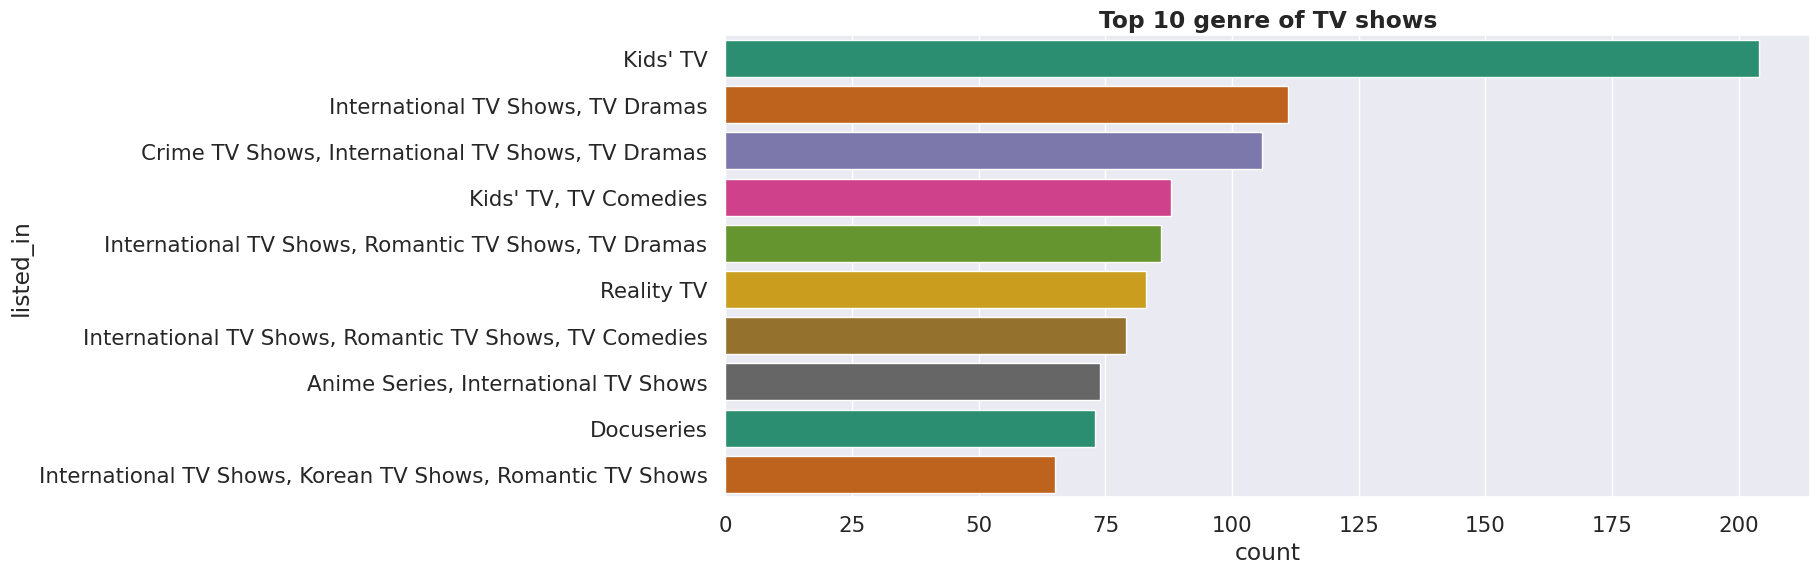

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Top 10 genre of TV shows',fontweight='bold')
plots=sns.countplot(y=tv_shows['listed_in'],data=tv_shows,order=tv_shows['listed_in'].value_counts().index[0:10],palette='Dark2')

##### 1. Why did you pick the specific chart?

Show the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

##### 2. What is/are the insight(s) found from the chart?

Top genre of tv show available on Netflix is Kids tv then,International tv shows , tv dramasetc.

#### Chart - 13- ****Top 10 genre of Movies****

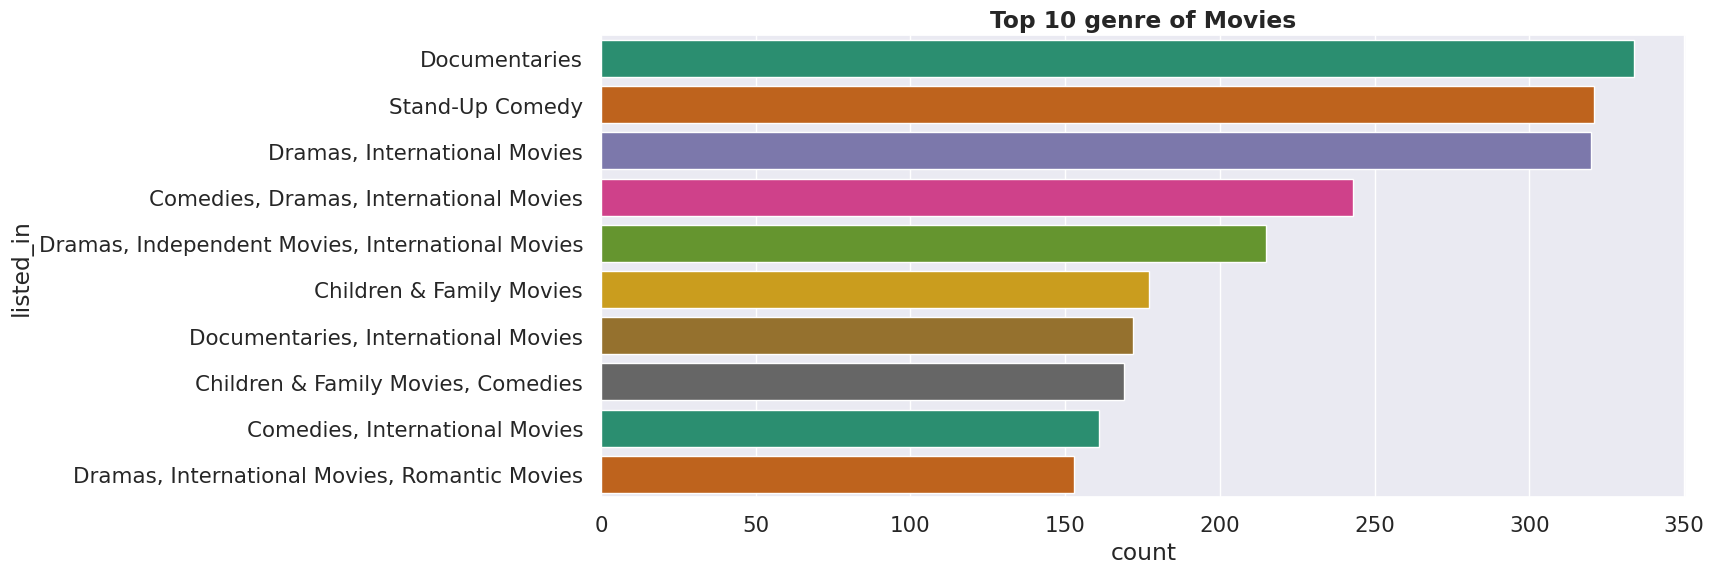

In [ ]:
plt.figure(figsize=(14,6))
plt.title('Top 10 genre of Movies',fontweight='bold')
plots=sns.countplot(y=movies['listed_in'],data=movies,order=movies['listed_in'].value_counts().index[0:10],palette='Dark2')

##### 1. Why did you pick the specific chart?

Show the counts of observations in each categorical bin using bars. A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

##### 2. What is/are the insight(s) found from the chart?

Top 10 genre of movie include movies of type Documentries,Comedy, Dramas,International movies, Children and family movies, romantic movies.

#### Chart - 14 -****Correlation Heatmap****

In [ ]:
# preparing heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']
df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['rating'],normalize="index").T
df_heatmap

country,Canada,Egypt,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
rating,,,,,,,,,,
Adult Content,0.435028,0.277228,0.669565,0.249187,0.366071,0.73,0.453552,0.828358,0.500000,0.460505
Children Content,0.254237,0.039604,0.052174,0.157096,0.200893,0.07,0.087432,0.052239,0.244949,0.188135
Family-friendly Content,0.152542,0.000000,0.104348,0.019502,0.080357,0.02,0.060109,0.014925,0.053030,0.096690
Not Rated,0.011299,0.000000,0.008696,0.006501,0.000000,0.04,0.016393,0.007463,0.012626,0.011472
Teen Content,0.146893,0.683168,0.165217,0.567714,0.352679,0.14,0.382514,0.097015,0.189394,0.243199


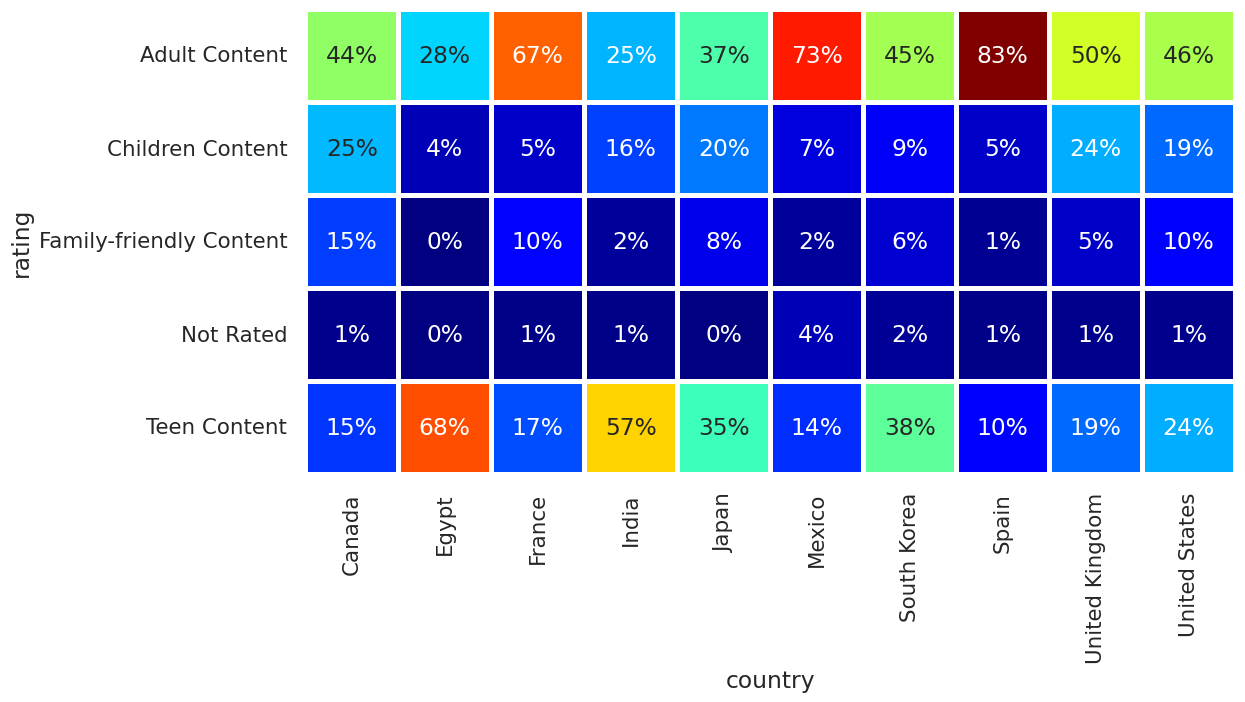

In [ ]:
ig,ax = plt.subplots(1,1,figsize=(12,12))
sns.heatmap(df_heatmap,cmap="jet",square = True,linewidth = 2.5, cbar=False, annot=True,fmt='1.0%')
plt.show()

##### 1. Why did you pick the specific chart?

This graph shows us which countries producing which type of content the most.

##### 2. What is/are the insight(s) found from the chart?

1. We found that most of the countries produces content related to Adult and Teen.

2. Amomg all the countries INDIA has less content in Adult segment than teen content.

3. 85% of content is Adult content from spain.

4. Canada produces more content related to Children and Family-Friendly content.

#####3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Companies should target the country audience according to there taste of content choice.

2. As in spain Production house should more focus on Adult content.

3. Production house should more focus on children and Family-friendly content for canada because there are chances of Growth.

#### Chart - 15 - ****Pair Plot****

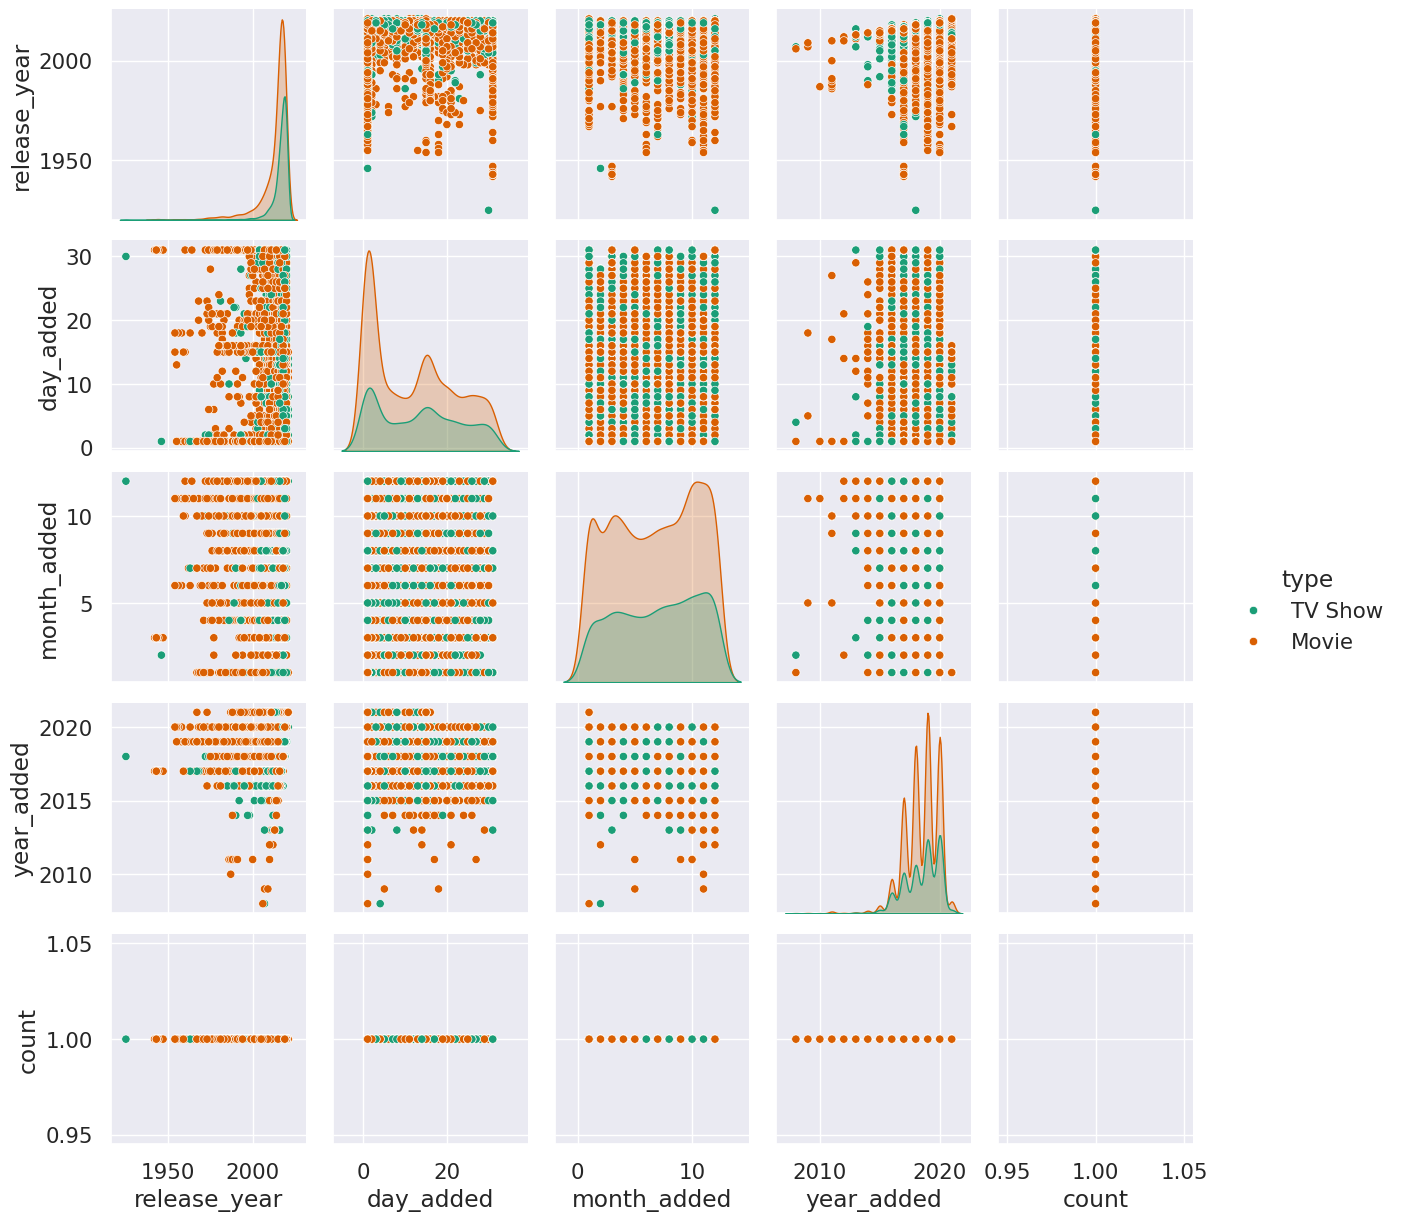

In [ ]:
# Pair Plot visualization code
sns.pairplot(df,hue='type',palette='Dark2')

##### 1. Why did you pick the specific chart?

 The Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. It is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   H0 : The hypothesis being tested is that movies rated for kids and older kids on Netflix have a duration of equal to two or more than two hours.

*   H1 : The hypothesis being tested is that movies rated for kids and older kids on Netflix have a duration of less that two hours.




In [ ]:
movies

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,minutes
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adult Content,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,93
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adult Content,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018,78
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teen Content,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017,80
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teen Content,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020,123
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2019,Adult Content,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",1,6,2020,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2006,Children Content,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",11,1,2020,88
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2005,Adult Content,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,19,10,2020,99
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,Teen Content,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,111
7784,s7785,Movie,Zulu Man in Japan,Director Unavailable,Nasty C,United States,2019,Adult Content,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",25,9,2020,44


In [ ]:
# making copy of clean dataframe
df_hypothesis = df.copy()
df_hypothesis.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,count
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adult Content,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adult Content,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adult Content,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teen Content,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teen Content,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020,1


In [ ]:
df_hypothesis = df_hypothesis[df_hypothesis['type']=='Movie']

In [ ]:
df_hypothesis['target_ages']=df_hypothesis['rating'].replace('rating_ages')
df_hypothesis['target_ages'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

In [ ]:
df_hypothesis['target_ages']=pd.Categorical(df_hypothesis['target_ages'],categories=['Adult Content', 'Teen Content', 'Children Content', 'Not Rated','Family-friendly Content'])
#from duration feature extraction string part and after extracting changing the object type to numeric
df_hypothesis['duration']=df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration']=pd.to_numeric(df_hypothesis['duration'])
df_hypothesis.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,count,target_ages
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adult Content,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,1,Adult Content
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adult Content,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018,1,Adult Content
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teen Content,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017,1,Teen Content
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teen Content,123,Dramas,A brilliant group of students become card-coun...,1,1,2020,1,Teen Content
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2019,Adult Content,95,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",1,6,2020,1,Adult Content


#### 2. Perform an appropriate statistical test.

In [ ]:
# group_by duration and target_ages
group_by_ = df_hypothesis[['duration','target_ages']].groupby(by='target_ages')
# mean of group_by variable
group = group_by_.mean().reset_index()
group

,target_ages,duration
0,Adult Content,98.347272
1,Teen Content,110.025332
2,Children Content,93.691796
3,Not Rated,96.119048
4,Family-friendly Content,53.672811


In [ ]:
# in A and B variable grouping values
A = group_by_.get_group('Children Content')
B = group_by_.get_group('Adult Content')
# mean and std
M1 = A.mean()
S1 = A.std()

M2 = B.mean()
S2 = B.std()

print("Mean for movies rated for children{}\n Mean for movies rated for adults {}".format(M1,M2))
print("Standard deviation for movies rated for children{}\n Standard deviation for movies rated for adults {}".format(S1,S2))

Mean for movies rated for childrenduration    93.691796
dtype: float64
 Mean for movies rated for adults duration    98.347272
dtype: float64
Standard deviation for movies rated for childrenduration    29.904367
dtype: float64
 Standard deviation for movies rated for adults duration    23.377716
dtype: float64


In [ ]:
#import stats
from scipy import stats
# length of groups and DOF
n1 = len(A)
n2 = len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2 + (n1-1)*S2**2) / dof
print('SP_2',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp_2)

# value
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

902 2511
dof 3411
SP_2 duration    802.413656
dtype: float64
SP duration    802.413656
dtype: float64
tvalue -4.233732523126472


In [ ]:
# t-distribution
stats.t.ppf(0.025,dof)

-1.9606597039535851

In [ ]:
# t-distribution
stats.t.ppf(0.975,dof)

1.9606597039535847



*   The null hypothesis stating that movies rated for children and adult on Netflix are atleast two hours long is rejected based on the t-value falling outside the specified range. Therefore it can be concluded that movies targeted for children and adult on Netflix have a duration less than 2 hours.



### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



*   H1 : The hypothesis being tested is that movies on Netflix have a duration of more than 90 minutes.
*   H0 : The hypothesis being tested is that there are no movies on Netflix with a duration of more than 90 minutes.



In [13]:
# making copy of clean dataframe
df_hypothesis = df.copy()
df_hypothesis.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adult Content,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adult Content,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adult Content,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teen Content,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teen Content,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020


In [14]:
#from duration feature extraction string part and after extracting changing the object type to numeric
df_hypothesis['duration']=df_hypothesis['duration'].str.extract('(\d+)')
df_hypothesis['duration']=pd.to_numeric(df_hypothesis['duration'])

In [15]:
df_hypothesis['type']=pd.Categorical(df_hypothesis['type'],categories=['Movie','TV Show'])
df_hypothesis.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,day_added,month_added,year_added
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adult Content,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adult Content,93,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adult Content,78,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teen Content,80,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teen Content,123,Dramas,A brilliant group of students become card-coun...,1,1,2020


In [16]:
# group_by duration and type
group_by_ = df_hypothesis[['duration','type']].groupby(by='type')
# mean of group_by variable
group = group_by_.mean().reset_index()
group

,type,duration
0,Movie,99.330417
1,TV Show,1.761468


In [17]:
# in A and B variable grouping values
A = group_by_.get_group('Movie')
B = group_by_.get_group('TV Show')
# mean and std
M1 = A.mean()
S1 = A.std()

M2 = B.mean()
S2 = B.std()

print("Mean {}".format(M1,M2))
print("Standard deviation {}".format(S2,S1))

Mean duration    99.330417
dtype: float64
Standard deviation duration    1.561099
dtype: float64


In [18]:
#import stats
from scipy import stats
# length of groups and DOF
n1 = len(A)
n2 = len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2 + (n1-1)*S2**2) / dof
print('SP_2',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp_2)

# value
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5372 2398
dof 7768
SP_2 duration    252.749896
dtype: float64
SP duration    252.749896
dtype: float64
tvalue 249.88962005047787


In [19]:
# t-distribution
stats.t.ppf(0.025,dof)

-1.9602694215408423

In [20]:
# t-distribution
stats.t.ppf(0.975,dof)

1.9602694215408418

Clearly the null hypothesis is rejected based on the t-value falling outside the specified range. Therefore it can be concluded that movies have time duration more than 90 minutes.

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
df_new=df
df_new.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,count
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adult Content,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adult Content,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adult Content,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018,1
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teen Content,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017,1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teen Content,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020,1


In [ ]:
df_new.shape

(7770, 15)

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df_new.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
day_added       0
month_added     0
year_added      0
count           0
dtype: int64

### 2. Handling Outliers

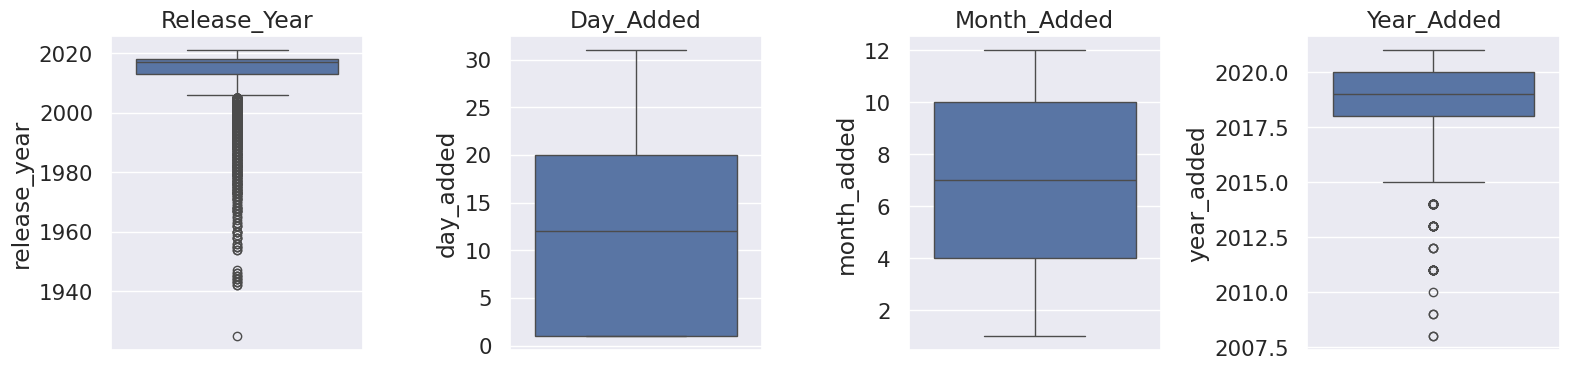

In [ ]:
# Handling Outliers & Outlier treatments
continuous_value_feature = ["release_year","day_added","month_added","year_added"]
plt.figure(figsize=(16,4))
for n, column in enumerate(continuous_value_feature):
    plt.subplot(1,4,n+1)
    sns.boxplot(df[column])
    plt.title(f'{column.title()}')
    plt.tight_layout()


### 3. Categorical Encoding

In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
day_added        int64
month_added      int64
year_added       int64
count            int64
dtype: object

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
df_new.shape

(7770, 15)

#### 1. Expand Contraction

In [ ]:
df['content_detail']=df['cast']+" "+df['director']+" "+df['listed_in']+" "+df['type']+" "+df['rating']+" "+df['country']+" "+df['description']
df.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,count,content_detail
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adult Content,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020,1,"João Miguel, Bianca Comparato, Michel Gomes, R..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adult Content,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,1,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adult Content,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018,1,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teen Content,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017,1,"Elijah Wood, John C. Reilly, Jennifer Connelly..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teen Content,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020,1,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar..."


**2**. **Lower Casing**

In [ ]:
#Lower Casing
df_new['content_detail']=df_new['content_detail'].str.lower()
df_new.iloc[281,]['content_detail']

'tamannaah bhatia, prabhu deva, sonu sood, sapthagiri, murli sharma, r.v. udhaykumar, joy mathew, hema a. l. vijay comedies, international movies, sci-fi & fantasy movie teen content india due to family pressure, a corporate man reluctantly marries a woman from the village, but in their new home, she abruptly assumes a different persona.'

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
def remove_punctuations(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,which in effect deletes the punctuation marks
    translator =str.maketrans('','',string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)


In [ ]:
# applying above function on text feature
df_new['content_detail']=df_new['content_detail'].apply(remove_punctuations)

#checking the observation after removing puctuations
df_new.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema a l vijay comedies international movies scifi  fantasy movie teen content india due to family pressure a corporate man reluctantly marries a woman from the village but in their new home she abruptly assumes a different persona'

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords
#using nltk library to download stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
sw = stopwords.words('english')
def remove_stopwords_and_whitespace(text):
    '''a function for removing the stopwords'''
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    text= " ".join(text)
    text=re.sub(r'\s+',' ',text)
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# applying above function on text feature
df_new['content_detail'] = df_new['content_detail'].apply(remove_stopwords_and_whitespace)
#checking the observation after removing puctuations
df_new.iloc[281,]['content_detail']

'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedies international movies scifi fantasy movie teen content india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

In [ ]:
df_new['content_detail'][0]

'joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi director unavailable international tv shows tv dramas tv scifi fantasy tv show adult content brazil future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

####10. Tokanization


In [ ]:
nltk.download('punkt')
df_new['content_detail']=df_new['content_detail'].apply(nltk.word_tokenize)
df_new.iloc[281,]['content_detail']

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['tamannaah',
 'bhatia',
 'prabhu',
 'deva',
 'sonu',
 'sood',
 'sapthagiri',
 'murli',
 'sharma',
 'rv',
 'udhaykumar',
 'joy',
 'mathew',
 'hema',
 'l',
 'vijay',
 'comedies',
 'international',
 'movies',
 'scifi',
 'fantasy',
 'movie',
 'teen',
 'content',
 'india',
 'due',
 'family',
 'pressure',
 'corporate',
 'man',
 'reluctantly',
 'marries',
 'woman',
 'village',
 'new',
 'home',
 'abruptly',
 'assumes',
 'different',
 'persona']

#### 10. Text Normalization

In [ ]:
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()

In [ ]:
def lemmatizing_sentence(text):
    '''This function is used to lemmatize'''
    text = [wordnet.lemmatize(word) for word in text]
    text = " ".join(text)
    return text

In [ ]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
df_new['content_detail']=df_new['content_detail'].apply(lemmatizing_sentence)
df_new.iloc[281,]['content_detail']

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


'tamannaah bhatia prabhu deva sonu sood sapthagiri murli sharma rv udhaykumar joy mathew hema l vijay comedy international movie scifi fantasy movie teen content india due family pressure corporate man reluctantly marries woman village new home abruptly assumes different persona'

#### 10. Part of speech tagging

In [ ]:
#tokenize text into words base word
df_new['pos_tag']=df_new['content_detail'].apply(nltk.word_tokenize).apply(nltk.pos_tag)
df_new.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,listed_in,description,day_added,month_added,year_added,count,content_detail,pos_tag
0,s1,TV Show,3%,Director Unavailable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,Adult Content,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,14,8,2020,1,joão miguel bianca comparato michel gomes rodo...,"[(joão, NN), (miguel, NN), (bianca, NN), (comp..."
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,Adult Content,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,23,12,2016,1,demián bichir héctor bonilla oscar serrano aza...,"[(demián, NN), (bichir, NN), (héctor, NN), (bo..."
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,Adult Content,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",20,12,2018,1,tedd chan stella chung henley hii lawrence koh...,"[(tedd, NN), (chan, NN), (stella, NN), (chung,..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,Teen Content,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",16,11,2017,1,elijah wood john c reilly jennifer connelly ch...,"[(elijah, RB), (wood, NN), (john, NN), (c, VBP..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,Teen Content,123 min,Dramas,A brilliant group of students become card-coun...,1,1,2020,1,jim sturgess kevin spacey kate bosworth aaron ...,"[(jim, NN), (sturgess, NN), (kevin, NN), (spac..."


#### 10. Text Vectorization

In [ ]:
# Vectorizing Text
# importing Tfidvectorizer from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer(max_features=30000)   #setting max_features=30000 to avoid explosionx

In [ ]:
# Applying Tfidvectorizer
x = tfidfv.fit_transform(df_new['content_detail'])
print(x.shape)

(7770, 30000)


##### Which text vectorization technique have you used and why?

We have used TFIDF vectorization in place of BAG OF WORDS because Tf-idf vectorization takes into account the importance of each word in a document. TF-IDF also assigns higher values to rare words that are unique to a particular document, making them more important in the representation.

### 7. Dimesionality Reduction

Do you think that dimensionality reduction is needed? Explain Why?

In textual data processing, there are 30,000 attributes are created in text vectorization and this huge amount of columns cannot be dealed with our local machines. So, we will using the Principal Component Analysis(PCA) techniques to reduce the dimensions of this huge sparse matrix.

In [ ]:
from sklearn.decomposition import PCA
#defining PCA object with desired number of components
pca = PCA()
#fitting the PCA model
pca.fit(x.toarray())
#percent of variance captured by each varince
var = pca.explained_variance_ratio_
print(f"Explaned variance:{var}")

Explaned variance:[1.49165116e-02 4.77488439e-03 3.66048895e-03 ... 8.85385249e-36
 1.63203689e-36 5.17096347e-38]


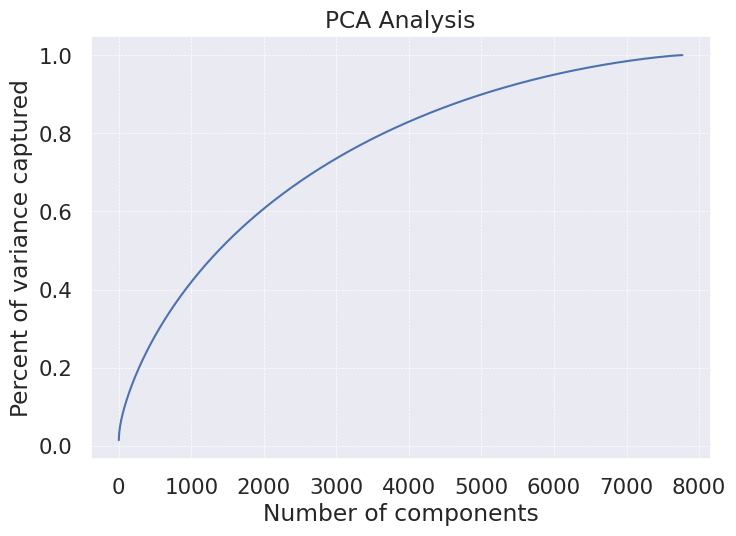

In [ ]:
#plotting percent of variance captured versus the number of components in order to determine the reduced dimension
fig,ax = plt.subplots()
ax.plot(range(1,len(var)+1),np.cumsum(pca.explained_variance_ratio_))
ax.set_xlabel('Number of components')
ax.set_ylabel('Percent of variance captured')
ax.set_title('PCA Analysis')
plt.grid(linestyle='--',linewidth=0.5)
plt.show()

It is clear from the above plot that 7770 principal components can capture the 100% of variance. For our case we will consider only those number of PC's that can capture 95% of variance.

In [ ]:
pca_tunned = PCA(n_components=0.95)
pca_tunned.fit(x.toarray())
x_transformed = pca_tunned.transform(x.toarray())
x_transformed.shape

(7770, 6001)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We have used PCA (Principal Component Analysis) for dimensionality reduction. PCA is a widely used technique for reducing the dimensionality of high-dimensional data sets while retaining most of the information in the original data.

*   explained_variance_ratio_ method of PCA is used to get the ration of variance (eigenvalue / total eigenvalues)
*   Bar chart is used to represent individual explained variances.
*   Step plot is used to represent the variance explained by different principal components.
*   Data needs to be scaled before applying PCA technique.







## ***ML Model Implementation***

## ***ML Model-1(Kmeans Clustering)***

K-means clustering is a type of unsupervised machine learning algorithm used for partitioning a dataset into K clusters based on similarity of data points. The goal of the algorithm is to minimize the sum of squared distances between each data point and its corresponding cluster centroid.
Let's just itterate over a loop of 1 to 16 clusters and try to find the optimal number of clusters with ELBOW method.

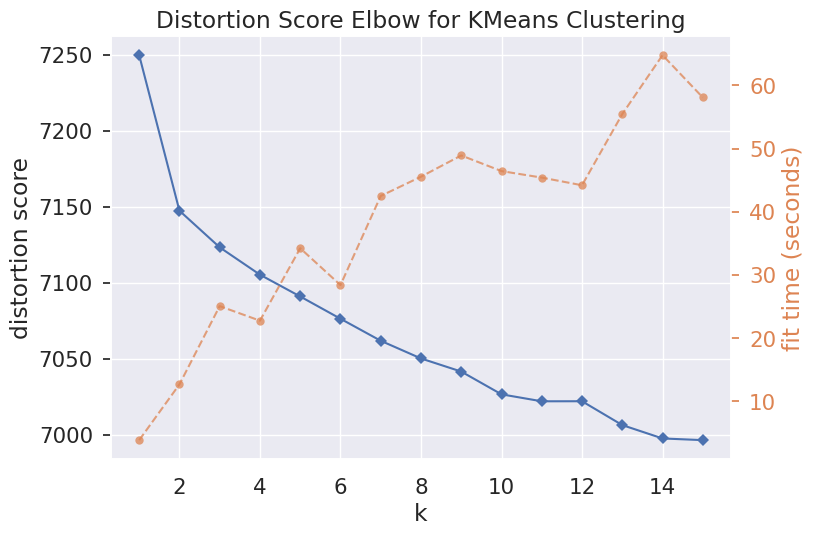

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
#initialising the clustering model and visualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model,k=(1,16),locate_elbow=False)
#fit the data to the visualizer
visualizer.fit(x_transformed)
#visualize
visualizer.show()

Here it seems that the elbow is forming at the 2 clusters but before blindly believing it let's plot one more chart that itterates over the same number of cluters and determines the Silhouette Score at every point.

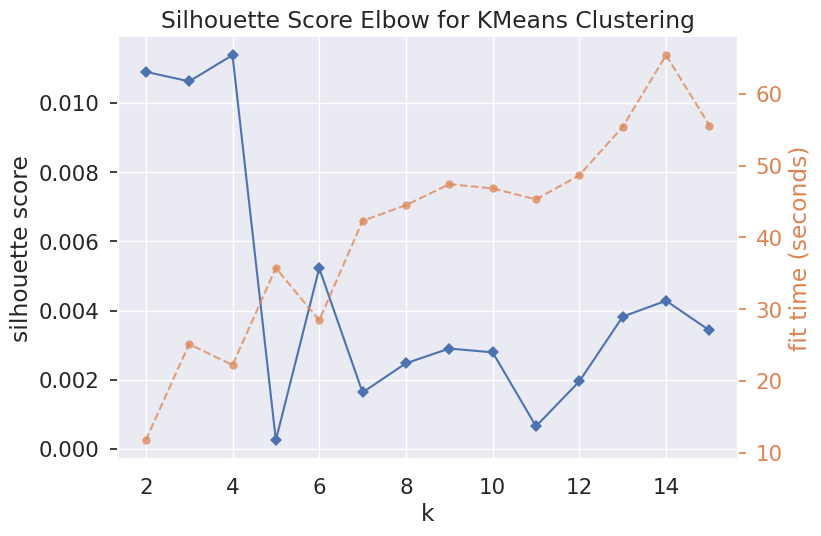

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
## Determining optimal value of K using KElbowVisualizer
# Importing needed library
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(model, k=(2,16), metric='silhouette', timings=True, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(x_transformed)

# Finalize and render the figure
visualizer.show()

The silhouette score ranges from -1 to 1, where a score of 1 indicates that the object is well-matched to its own cluster, and poorly-matched to neighboring clusters. Conversely, a score of -1 indicates that the object is poorly-matched to its own cluster, and well-matched to neighboring clusters.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
k_range = range(2, 7)
for k in k_range:
    Kmodel = KMeans(n_clusters=k)
    labels = Kmodel.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, silhouette score=%f" % (k, score))

k=2, silhouette score=0.010797
k=3, silhouette score=0.010392
k=4, silhouette score=0.010817
k=5, silhouette score=0.003481
k=6, silhouette score=0.005131


From the above plots (Elbow plot and Sillhouette plot) it is very clear that the Silhoutte score is comparatively good for 4 number of clusters, so we will consider 4 cluster in kmeans analysis.

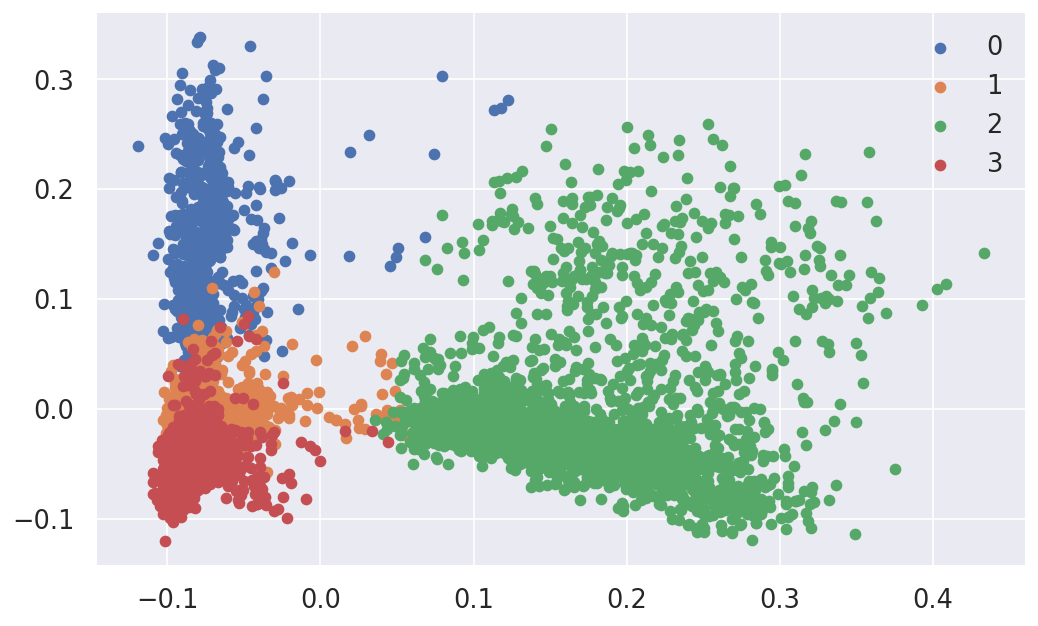

In [ ]:
#training the K-means model on a dataset
kmeans = KMeans(n_clusters=4, init='k-means++', random_state= 0)

#predict the labels of clusters.
plt.figure(figsize=(10,6), dpi=120)
label = kmeans.fit_predict(x_transformed)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(x_transformed[label == i , 0] , x_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()


We have 4 different clusters.

In [ ]:
df_new['kmeans_cluster'] = kmeans.labels_

### ML Model - 2

Hierarchical clustering is a type of clustering algorithm used for grouping similar data points together into clusters based on their similarity, by recursively merging or dividing clusters based on a measure of similarity or distance between them.

Let's dive into it by plotting a Dendogram and then we will determine the optimal number of clusters.

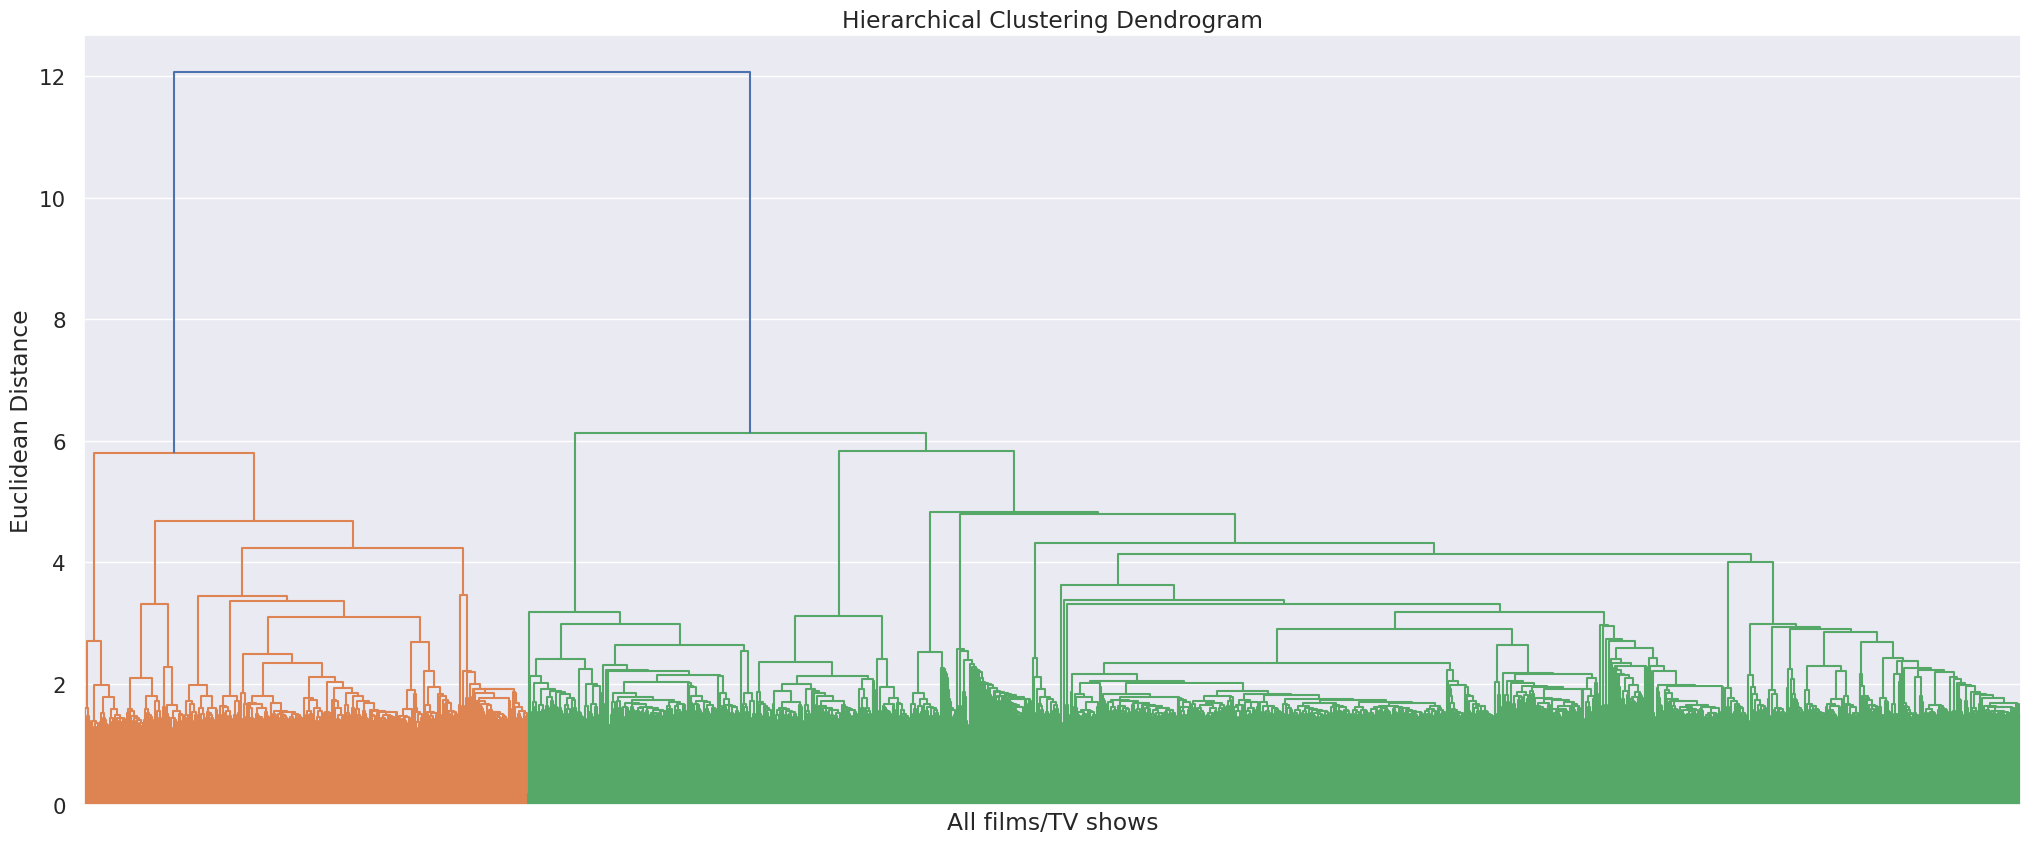

In [ ]:
#importing needed libraries
from scipy.cluster.hierarchy import linkage, dendrogram

# HIERARCHICAL CLUSTERING
distances_linkage = linkage(x_transformed, method = 'ward', metric = 'euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Euclidean Distance')

dendrogram(distances_linkage, no_labels = True)
plt.show()



From the above Dendogram we can say that optimal value of clusters is 2. But before assigning the vlaues to respective clusters, let's check the silhouette scores using Agglomerative clustering and follow the bottom up approach to aggregate the datapoints.

A dendrogram is a tree-like diagram that records the sequences of merges or splits.More the distance of the vertical lines in the dendrogram, more the distance between those clusters.
From the above Dendogram we can say that optimal value of clusters is 2. But before assigning the vlaues to respective clusters, let's check the silhouette scores using Agglomerative clustering and follow the bottom up approach to aggregate the datapoints.

In [ ]:
## Computing Silhouette score for each k
# Importing needed libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Range selected from dendrogram above
k_range = range(2, 10)
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(x_transformed)
    score = silhouette_score(x, labels)
    print("k=%d, Silhouette score=%f" % (k, score))

k=2, Silhouette score=0.006041
k=3, Silhouette score=0.005866
k=4, Silhouette score=0.005729
k=5, Silhouette score=0.000806
k=6, Silhouette score=0.001469
k=7, Silhouette score=0.001848
k=8, Silhouette score=0.001358
k=9, Silhouette score=0.001658


From the above silhouette scores it is clear that the 2 clusters are optimal value (maximum Silhouette score), which is also clear from the above Dendogram that for 2 cluters the euclidean distances are maximum.

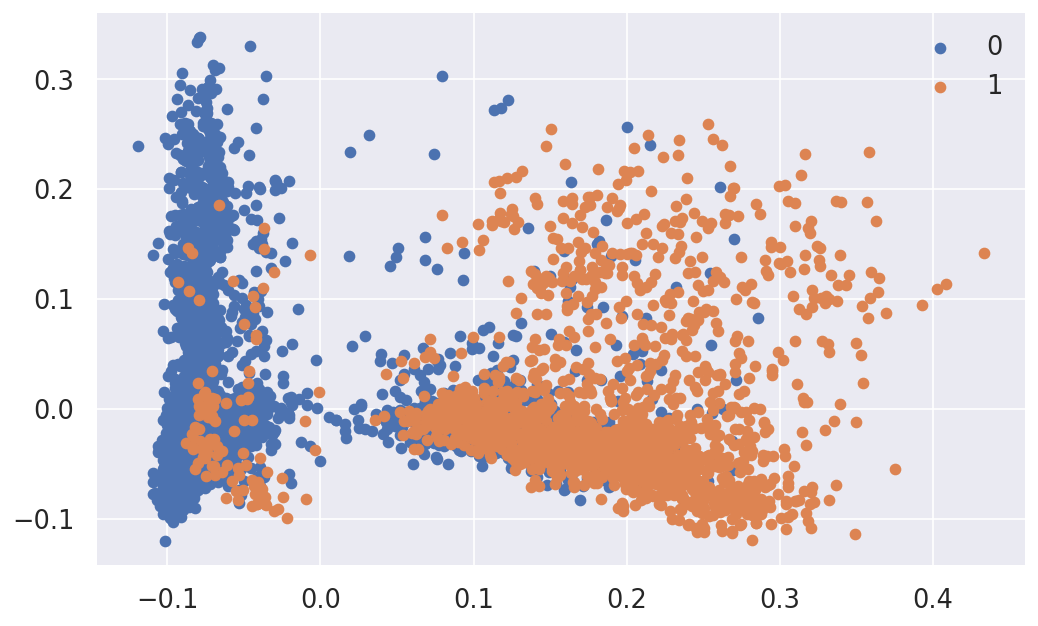

In [ ]:
Agmodel = AgglomerativeClustering(n_clusters = 2,affinity = 'euclidean',linkage = 'ward')
plt.figure(figsize=(10,6),dpi=120)
label = Agmodel.fit_predict(x_transformed)
#setting unique label
unique_labels = np.unique(label)
#plotting the results
for i in unique_labels:
    plt.scatter(x_transformed[label == i,0],x_transformed[label == i,1],label=i)
plt.legend()
plt.show()

# **Conclusion**

##**Conclusions drawn from EDA**
**Based on the exploratory data analysis (EDA) of the Netflix movies and TV shows clustering dataset, we have drawn the following conclusions:**

*   Movies make up about two-thirds of Netflix content, with TV shows comprising the remaining one-third.


*  Adult and teen categories are prevalent on Netflix, while family-friendly content is more common in TV shows than in movies.

*   The United States is the largest producer of movies and TV shows on Netflix, followed by India. Japan and South Korea have more TV shows than movies, indicating growth potential in that area.
*   International movies, drama, and comedy are the most popular genres on Netflix.

*   TV show additions on Netflix have increased since 2018, while movie additions have decreased. In 2020, fewer movies were added compared to 2019, but more TV shows were added.

*   October, November, and December are popular months for adding TV shows, while January, October, and November are popular for adding movies. February sees the least additions.

*   Movies and TV shows are typically added at the beginning or middle of the month and are popularly added on weekends.



*   Most movies on Netflix have durations between 80 to 120 minutes, while TV shows commonly have one or two seasons.
*   Various countries contribute adult and teen content, with Spain producing the most adult content and Canada focusing on children and family-friendly categories.

##**Conclusions drawn from ML Model**

*   Implemented K-Means Clustering and Agglomerative Hierarchical Clustering, to cluster the Netflix Movies TV show dataset.
*   List item


*   The optimal number of clusters we are getting from K-means is 4, whereas for Agglomerative Hierarchical Clustering the optimal number of clusters are found out to be 2.


*   We chose Silhouette Score as the evaluation metric over distortion score because it provides a more intuitive and interpretable result. Also Silhouette score is less sensitive to the shape of the clusters.










### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***